In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/HeartDesies.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

# EDA & Data Cleaning

In [ ]:
# Getting a concise summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Displaying the names of all columns in the DataFrame.
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# This shows the distribution of our target variable (0 for no disease, 1 for heart disease)
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


<Axes: xlabel='HeartDisease'>

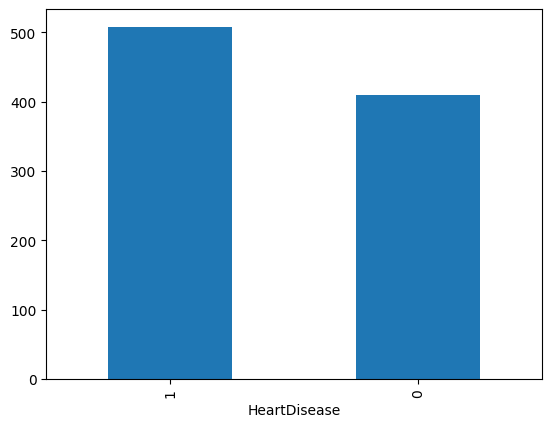

In [ ]:
# This provides a visual representation of class imbalance, if any.
df['HeartDisease'].value_counts().plot(kind='bar')

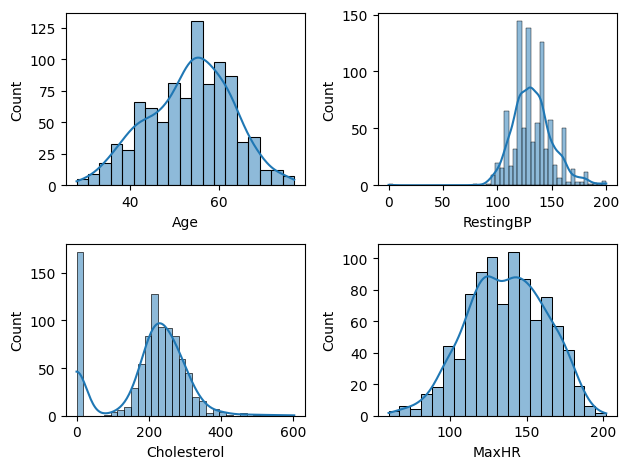

In [ ]:
# This function allows for quick visualization of the distribution of several columns in a single figure.
# var is the column I want to draw, and num is the position of the graph in the 2×2 layout.
def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var], kde=True)

# This helps in identifying skewness, outliers, and the overall shape of these important numerical features.
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout()

In [ ]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [ ]:
# Calculating the mean of 'RestingBP' (Resting Blood Pressure) while excluding any zero values.
# Zero values in medical data often represent missing or unrecorded information rather than an actual zero measurement.
RBP_mean = df.loc[df['RestingBP'] != 0 , 'RestingBP'].mean()     # median() alsop
RBP_mean

np.float64(132.54089422028352)

In [ ]:
# This imputation strategy helps in handling missing data by filling it with a representative value.
# The values are then rounded to two decimal places for consistency.
df['RestingBP'] = df['RestingBP'].replace(0,RBP_mean)
df['RestingBP'] = df['RestingBP'].round(2)

In [ ]:
# Similar to 'RestingBP', zero cholesterol values are likely indicators of missing data.
ch_mean = df.loc[df['Cholesterol'] != 0 , 'Cholesterol'].mean()     # median
ch_mean

np.float64(244.6353887399464)

In [ ]:
# Replacing all zero values in the 'Cholesterol' column with the calculated mean (excluding zeros)
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

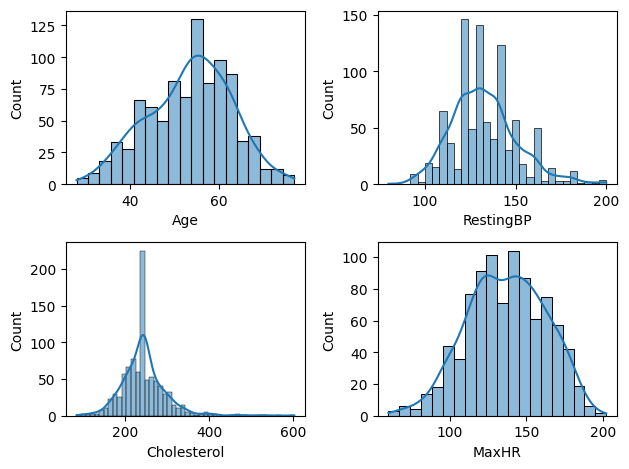

In [ ]:
def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var], kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout()

In [ ]:
# sns.countplot(x = df['Sex'])

1️⃣ ATA – Atypical Angina

Chest pain but not classic heart pain

Not strongly related to physical exertion

Usually less dangerous

Often NO heart disease (as seen in your blue bars)

2️⃣ NAP – Non-Anginal Pain

Pain not related to the heart

Could be muscle pain, gastric pain, etc.

Mostly NOT heart disease

Moderate number of cases in both categories

3️⃣ ASY – Asymptomatic (No Pain)

⭐ Most important category

Means no chest pain at all

But ECG or other tests show heart issues

Very HIGH risk

In your graph, ASY has the highest count for HeartDisease = 1 (orange bar)

Why?
Because many heart patients show silent symptoms — no chest pain but still serious blockage.

4️⃣ TA – Typical Angina

Classic chest pain due to exercise or stress

Pain goes away with rest

Here you see low number of cases, but some are heart disease.

<Axes: xlabel='ChestPainType', ylabel='count'>

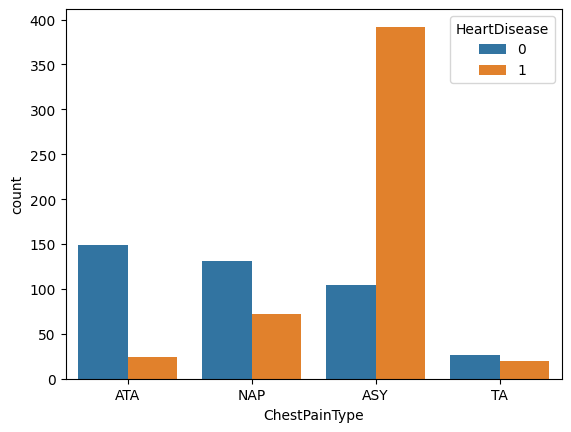

In [ ]:
# ATA: Unusual chest pain     # NAP: Pain not related to heart
# ASY: No pain but highest risk   # TA: Classic heart pain
sns.countplot(x = df['ChestPainType'], hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

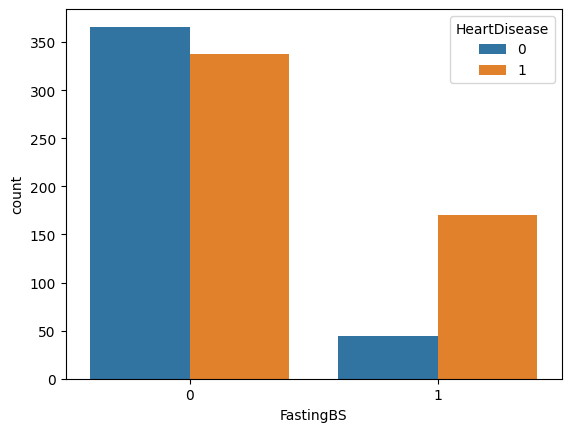

In [ ]:
# FastingBS means Fasting Blood Sugar. It has only two values:
# 0 → normal (≤120 mg/dL) # 1 → high (>120 mg/dL)
sns.countplot(x = df['FastingBS'], hue=df['HeartDisease'])

<Axes: xlabel='Cholesterol'>

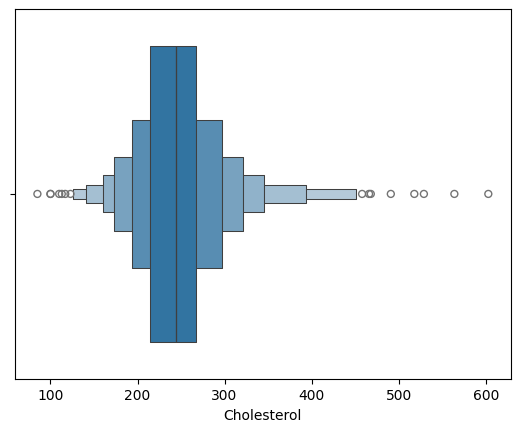

In [ ]:
# “Boxen plot shows how cholesterol values are spread and highlights extreme values clearly.”
sns.boxenplot(x = df['Cholesterol'])

<Axes: >

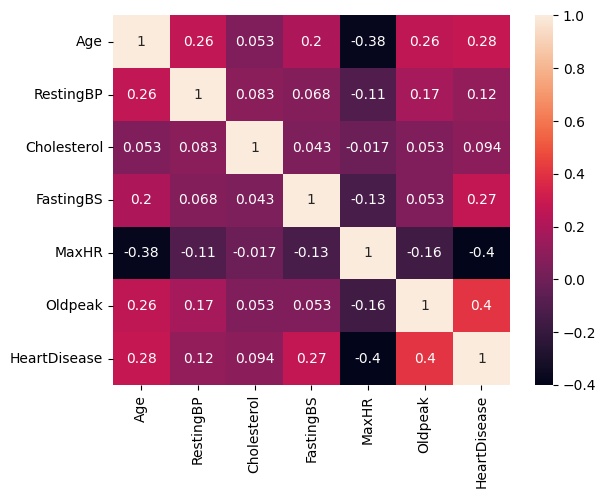

In [ ]:
# +1 → perfect positive relationship  # -1 → perfect negative relationship
# 0 → no relationship
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data Preprocessing

In [ ]:
df_encode = pd.get_dummies(df,drop_first=True)

In [ ]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [ ]:
df_encoded = df_encode.astype(int)

In [ ]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [ ]:
df_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
x = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
# Initializing StandardScaler to scale the features.
# Feature scaling is important for many machine learning algorithms, especially those that rely on distance calculations (e.g., KNN, SVM) or gradient descent (e.g., Logistic Regression).
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled)
print(x_test_scaled)

[[-1.24506731 -0.74576034 -0.10359418 ... -0.83846064 -1.03325003
  -0.84792072]
 [-1.8862362  -0.1826618  -0.71808371 ... -0.83846064 -1.03325003
   1.17935554]
 [ 0.25099346  0.94353528 -0.63879474 ...  1.19266183  0.96781995
  -0.84792072]
 ...
 [ 0.67843939 -0.1826618   0.15409499 ...  1.19266183 -1.03325003
   1.17935554]
 [ 0.67843939  1.05615499 -0.0243052  ...  1.19266183 -1.03325003
   1.17935554]
 [-1.45879027  0.94353528  2.90938678 ... -0.83846064  0.96781995
  -0.84792072]]
[[ 0.99902384  0.38043674 -0.99559512 ... -0.83846064 -1.03325003
   1.17935554]
 [-0.06959099  0.66198601  5.40698941 ... -0.83846064  0.96781995
  -0.84792072]
 [ 1.2127468   1.50663382 -0.0243052  ... -0.83846064  0.96781995
  -0.84792072]
 ...
 [ 1.10588532  0.43674659 -0.0243052  ...  1.19266183  0.96781995
  -0.84792072]
 [-0.49703693 -0.1826618   0.41178415 ... -0.83846064 -1.03325003
   1.17935554]
 [ 1.10588532  0.60567615 -0.0243052  ...  1.19266183  0.96781995
  -0.84792072]]


In [ ]:
# Logistic Regression is a linear model used for binary classification.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
lgr = LogisticRegression()
lgr.fit(x_train_scaled, y_train)
predict = lgr.predict(x_test_scaled)
cm = confusion_matrix(predict,y_test)
cr = classification_report(predict,y_test)
print(cm)
print(cr)

[[68 15]
 [ 9 92]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        83
           1       0.86      0.91      0.88       101

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [ ]:
# KNN is a non-parametric, lazy learning algorithm that classifies data points based on the majority class of its 'k' nearest neighbors.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
predict = knn.predict(x_test_scaled)
cm = confusion_matrix(predict,y_test)
cr = classification_report(predict,y_test)
print(cm)
print(cr)

[[66 14]
 [11 93]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        80
           1       0.87      0.89      0.88       104

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [ ]:
# Decision Trees are non-linear models that make decisions by splitting data based on feature values.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
dtc=DecisionTreeClassifier()
dtc.fit(x_train_scaled, y_train)
predict=dtc.predict(x_test_scaled)
cm = confusion_matrix(predict,y_test)
cr = classification_report(predict,y_test)
print(cm)
print(cr)

[[64 29]
 [13 78]]
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        93
           1       0.73      0.86      0.79        91

    accuracy                           0.77       184
   macro avg       0.78      0.77      0.77       184
weighted avg       0.78      0.77      0.77       184



In [ ]:
# SVC is a powerful model for classification that finds the optimal hyperplane to separate classes.
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_scaled, y_train)
predict = svc.predict(x_test_scaled)
cm = confusion_matrix(predict,y_test)
cr = classification_report(predict,y_test)
print(cm)
print(cr)

[[65 16]
 [12 91]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        81
           1       0.85      0.88      0.87       103

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



In [ ]:
# This might be for re-evaluation or an alternative run with potentially different parameters if this were a full experiment.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scaled, y_train)
predict = dtc.predict(x_test_scaled)
cm = confusion_matrix(predict,y_test)
cr = classification_report(predict,y_test)
print(cm)
print(cr)

[[65 26]
 [12 81]]
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        91
           1       0.76      0.87      0.81        93

    accuracy                           0.79       184
   macro avg       0.80      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184



In [ ]:
# Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_scaled, y_train)
predict = gnb.predict(x_test_scaled)
cm = confusion_matrix(predict,y_test)
cr = classification_report(predict,y_test)
print(cm)
print(cr)

[[69 20]
 [ 8 87]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83        89
           1       0.81      0.92      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [ ]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,0,1,0,0,0,0,0,1,0


In [ ]:
import pickle, json

# I saved my trained KNN model as classifier.pkl using pickle.
model_to_save = knn
with open('/content/classifier.pkl','wb') as f:
    pickle.dump(model_to_save, f)

# I saved the StandardScaler as scaler.pkl.
# This is important because any new user input in the app must be scaled the same way as the training data.”
with open('/content/scaler.pkl','wb') as f:
    pickle.dump(scaler, f)

# I also saved the feature names in features.json.
features = x.columns.tolist()
with open('/content/features.json','w') as f:
    json.dump(features, f)


# Confirming the successful saving of all necessary assets and providing a summary.
print("Saved classifier.pkl, scaler.pkl, features.json")
print("Feature count:", len(features))
print(features[:10])

Saved classifier.pkl, scaler.pkl, features.json
Feature count: 15
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA']
